In [615]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="lightgbm")

Load the dfsets

In [3]:
df_train = pd.read_csv("Dataset/train.csv")
df_test = pd.read_csv("Dataset/test.csv")

Combine the Train and Test into one dfframe

In [5]:
df_train['Source']="Train"
df_test['Source']="Test"
df = pd.concat([df_train, df_test],ignore_index=True)
print(df_train.shape,df_test.shape,df.shape)

(8523, 13) (5681, 12) (14204, 13)


In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Train


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

Check for Missing Values

In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

Upon Observation the Item_Weight and Outlet_Size contains the null values. Null Vlues in Item_Outlet_Sales is just part of test set of the df so it is ignored

## Explotaory df Analysis (EDA)

Numerical df Analysis

In [13]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Item_Visibility for some products is zero which is impossible if they are sold.

Outlet_Establishment_Year ranges from 1985 - 2009 which is not useful in this format

In [15]:
df.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
Source                           2
dtype: int64

Item_Identifier unique values indicate that there are 1559 products

Outlet_Identifier idicates 10 different outlets

### Visualizing target variable distribution

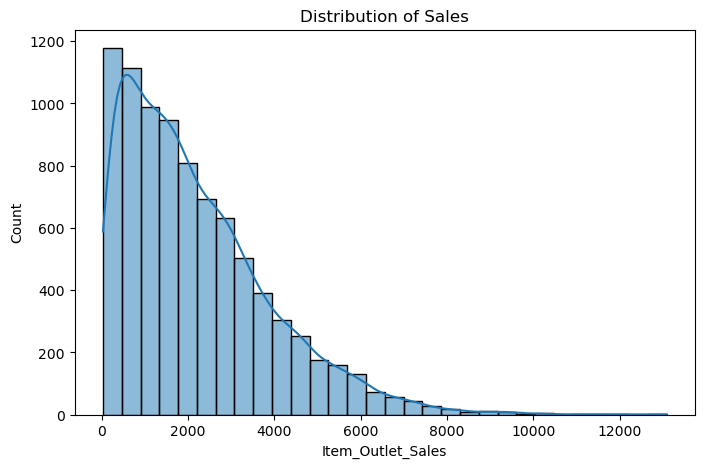

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Item_Outlet_Sales"], bins=30, kde=True)
plt.title("Distribution of Sales")
plt.show()

The sales is positive skewed showing almost 75% of sales is under 3101

### Correlation heatmap

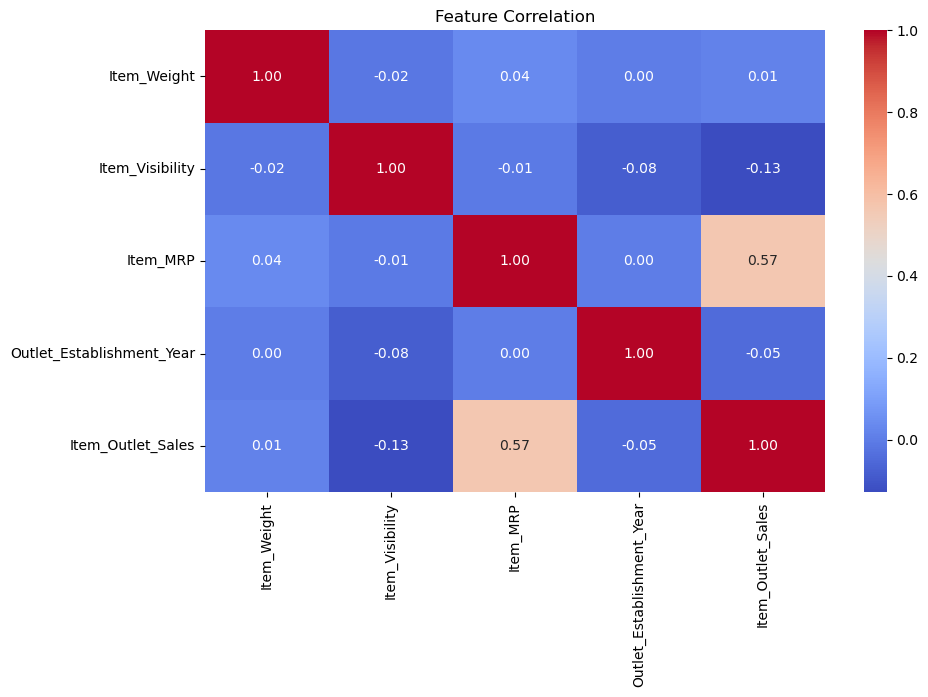

In [21]:
numeric_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()

### Average Sales by Item Type

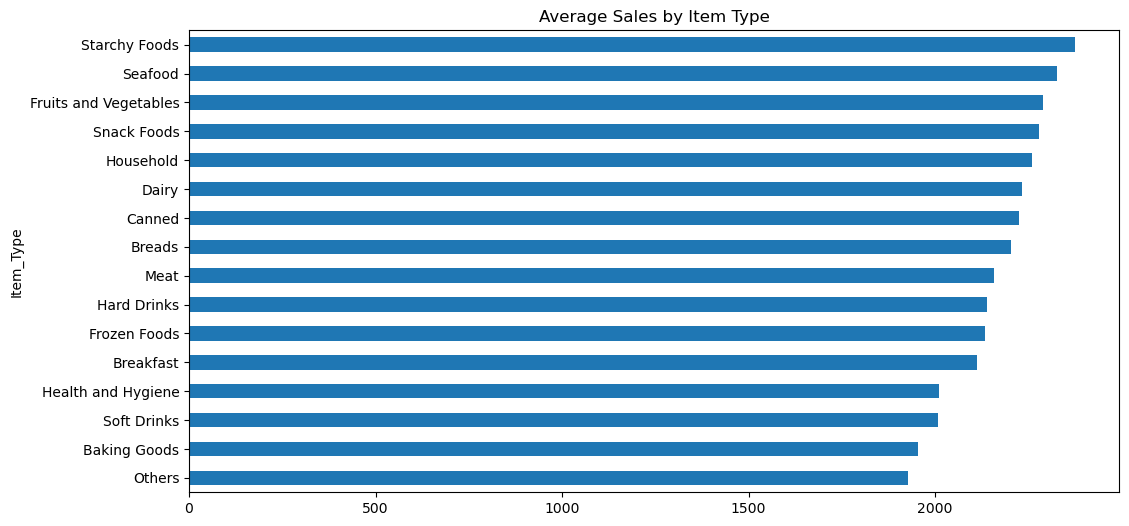

In [23]:
plt.figure(figsize=(12, 6))
df.groupby("Item_Type")["Item_Outlet_Sales"].mean().sort_values().plot(kind="barh")
plt.title("Average Sales by Item Type")
plt.show()

### Distribution of Outlet Types

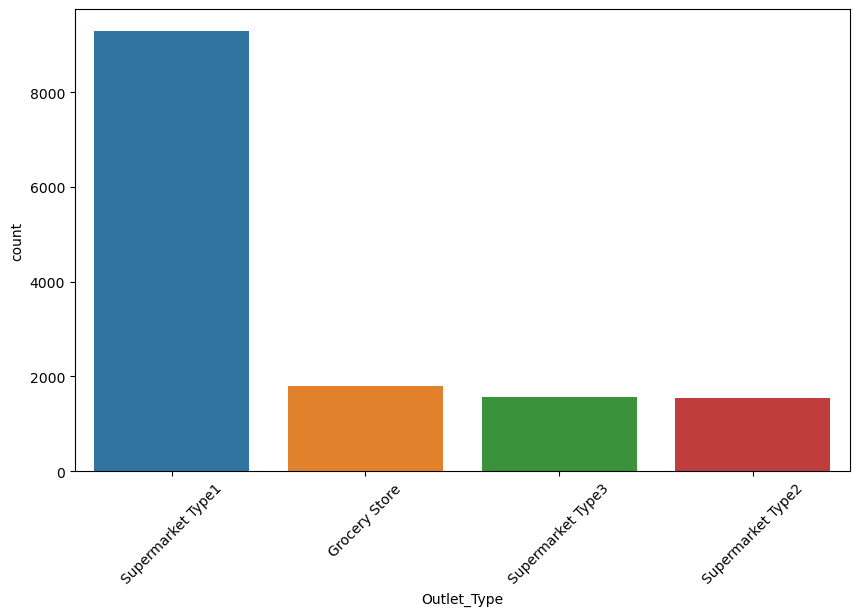

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Outlet_Type", order=df["Outlet_Type"].value_counts().index)
plt.xticks(rotation=45)
plt.show()

### Distribution of Item Fat Type

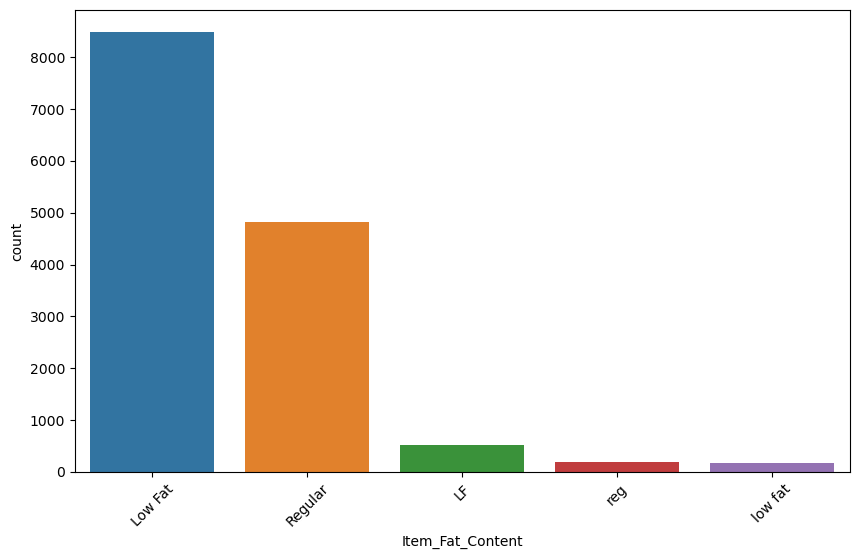

In [50]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Item_Fat_Content", order=df["Item_Fat_Content"].value_counts().index)
plt.xticks(rotation=45)
plt.show()

### Distribution of Outlet Size and Outlet Tier City

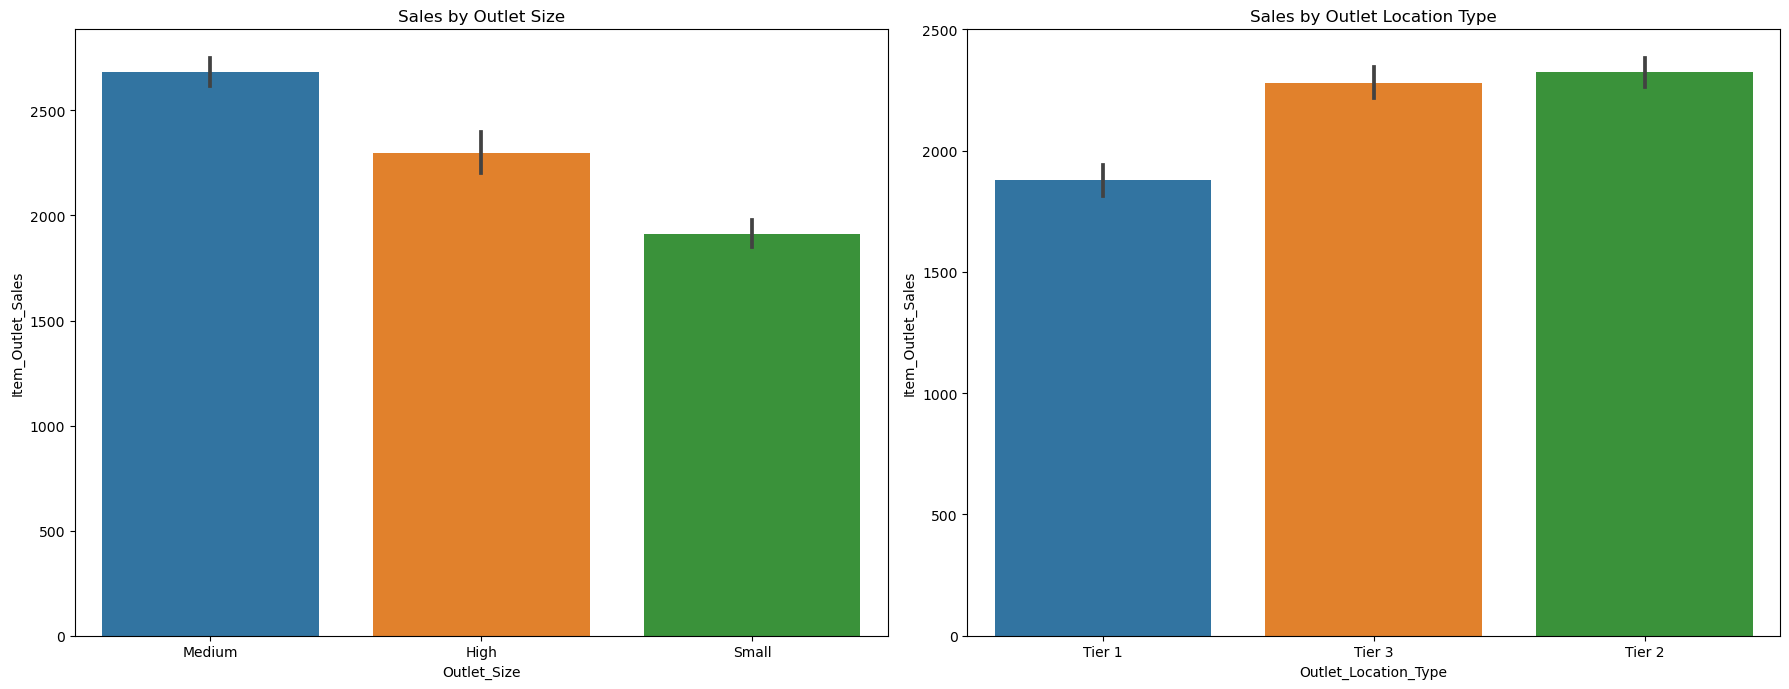

In [54]:
fig, axes = plt.subplots(1,2, figsize=(18, 7))
sns.barplot(x="Outlet_Size", y="Item_Outlet_Sales", data=df, ax=axes[0])
axes[0].set_title("Sales by Outlet Size")
sns.barplot(x="Outlet_Location_Type", y="Item_Outlet_Sales", data=df, ax=axes[1])
axes[1].set_title("Sales by Outlet Location Type")
plt.tight_layout()
plt.show()

### Outiers In Item_Outlet_Sales

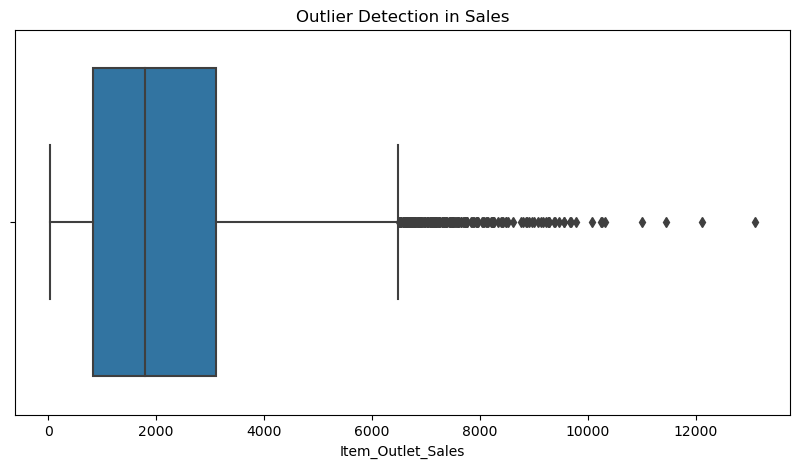

In [57]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Item_Outlet_Sales"])
plt.title("Outlier Detection in Sales")
plt.show()

There appaers to be outliers in sales column

## Feature Engineering

Adding Missing Values in Item Weight by the median weight of the Item

In [62]:
df['Item_Weight'] = df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(x.median()))

Adding Missing Outelt Size with the mode of the Outlet Type

In [65]:
df['Outlet_Size'] = df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]))

Replacing Mis-Coded Values in Item_Fat_Content with the categories "Low Fat" and "Regular"

In [68]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat',
                                                         'LF': 'Low Fat',
                                                         'reg': 'Regular'})

Creating a New Column Years_Of_Operation showing the number of years the shop was open becuase older the shop higher is the chance of sales

In [71]:
df['Years_Of_Operation'] = 2025 - df['Outlet_Establishment_Year']

Input mean Item_Visibility of a particular Item where Item_Visibility is zero

In [74]:
avg_visibility = df.groupby('Item_Identifier')['Item_Visibility'].transform('mean')
df['Item_Visibility'] = np.where(df['Item_Visibility'] == 0, avg_visibility, df['Item_Visibility'])

Create a broad category of Type of Item

In [77]:
df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
df['Item_Type_Combined'].value_counts()

Item_Type_Combined
Food              10201
Non-Consumable     2686
Drinks             1317
Name: count, dtype: int64

In [79]:
from sklearn.preprocessing import LabelEncoder

In [81]:
le = LabelEncoder()

### Numeric Encoder

In [84]:
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])

In [86]:
df['Outlet'].value_counts()

Outlet
5    1559
1    1553
9    1550
8    1550
6    1550
7    1548
3    1546
2    1543
0     925
4     880
Name: count, dtype: int64

In [88]:
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [90]:
df[var_mod].describe()

,Item_Fat_Content,Outlet_Location_Type,Outlet_Size,Item_Type_Combined,Outlet_Type,Outlet
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,0.353351,1.112856,1.453605,1.096381,1.201281,4.722473
std,0.478027,0.812755,0.683045,0.522065,0.796543,2.837101
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
50%,0.000000,1.000000,2.000000,1.000000,1.000000,5.000000
75%,1.000000,2.000000,2.000000,1.000000,1.000000,7.000000
max,1.000000,2.000000,2.000000,2.000000,3.000000,9.000000


### One Hot Encoding

In [93]:
df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type',
                                   'Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  object 
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Identifier          14204 non-null  object 
 6   Outlet_Establishment_Year  14204 non-null  int64  
 7   Item_Outlet_Sales          8523 non-null   float64
 8   Source                     14204 non-null  object 
 9   Years_Of_Operation         14204 non-null  int64  
 10  Item_Fat_Content_0         14204 non-null  bool   
 11  Item_Fat_Content_1         14204 non-null  bool   
 12  Outlet_Location_Type_0     14204 non-null  bool   
 13  Outlet_Location_Type_1     14204 non-null  boo

In [120]:
#Drop the columns which have been converted to different types:
#df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
df_train = df.loc[df['Source']=="Train"]
df_test = df.loc[df['Source']=="Test"]

#Drop unnecessary columns:
df_test.drop(['Item_Outlet_Sales','Source'],axis=1,inplace=True)
df_train.drop(['Source'],axis=1,inplace=True)

#Export files as modified versions:
df_train.to_csv("Dataset/train_modified.csv",index=False)
df_test.to_csv("Dataset/test_modified.csv",index=False)

C:\Users\user\AppData\Local\Temp\ipykernel_10156\1315879973.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['Item_Outlet_Sales','Source'],axis=1,inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_10156\1315879973.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['Source'],axis=1,inplace=True)


## Modeling

In [601]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [254]:
df_train = pd.read_csv("Dataset/train_modified.csv")
df_test = pd.read_csv("Dataset/test_modified.csv")

### Baseline Model

In [147]:
mean_sales = df_train.groupby(["Item_Identifier", "Outlet_Identifier"])['Item_Outlet_Sales'].mean().reset_index()

df_test = pd.merge(df_test, mean_sales[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']], 
                    how="left", on=["Item_Identifier", "Outlet_Identifier"])
df_test["Item_Outlet_Sales"].fillna(df_train["Item_Outlet_Sales"].mean(), inplace=True)

base1 = df_test[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']]
base1.to_csv("Results/Baseline_Model.csv",index=False)

In [478]:
df_train = pd.read_csv("Dataset/train_modified.csv")
df_test = pd.read_csv("Dataset/test_modified.csv")

In [480]:
X = df_train.drop(columns=["Item_Identifier", "Outlet_Identifier","Item_Outlet_Sales"])
y = df_train["Item_Outlet_Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [482]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (6818, 29)
y_train shape: (6818,)


In [450]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

### Model Function

In [769]:
def train_and_evaluate(model, model_name,X_train, X_test, y_train, y_test,final_test):
    IDcol = ['Item_Identifier','Outlet_Identifier']
    df_test_final=final_test.drop(IDcol,axis=1)
    
    # Cross-validation scores
    cv_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error'))
    cv_r2 = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    cv_mae = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_final = model.predict(df_test_final)
    y_pred_final = np.maximum(y_pred_final, 0)
    
    metrics = {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "CV Mean RMSE": np.mean(cv_rmse),
        "CV Mean R2": np.mean(cv_r2),
        "CV Mean MAE": np.mean(cv_mae)
    }
    
    print(f"{model_name} Metrics:")
    
    for key, value in metrics.items():
        print(f"{key}: {value:.4f}")
    
    pred_df = pd.DataFrame({
        "Item_Identifier": final_test["Item_Identifier"],
        "Outlet_Identifier": final_test["Outlet_Identifier"],
        "Item_Outlet_Sales": y_pred_final
    })
    pred_df.to_csv(f"Results/{model_name}_Results.csv", index=False)
    print(f"Results saved for {model_name}")
    
    return metrics

### Linear Regression Model

In [772]:
lr_model = LinearRegression()
metrics_lr = train_and_evaluate(lr_model,"Linear_Regression_Model",X_train, X_test, y_train, y_test,df_test)

Linear_Regression_Model Metrics:
RMSE: 1067.0209
R2: 0.5811
MAE: 790.4279
CV Mean RMSE: 1145.3746
CV Mean R2: 0.5553
CV Mean MAE: 850.7625
Results saved for Linear_Regression_Model


### Ridge Regression Model

In [775]:
ridge_model = Ridge(alpha=1.0)
metrics_ridge = train_and_evaluate(ridge_model,"Ridge_Regression_Model",X_train_scaled, X_test_scaled, y_train, y_test,df_test)

Ridge_Regression_Model Metrics:
RMSE: 1067.0266
R2: 0.5811
MAE: 790.4252
CV Mean RMSE: 1145.3720
CV Mean R2: 0.5553
CV Mean MAE: 850.7356
Results saved for Ridge_Regression_Model


### Decision Tree Regressor Model

In [778]:
dt_model = DecisionTreeRegressor(random_state=42)
metrics_dt = train_and_evaluate(dt_model,"Decision_Tree_Regressor_Model",X_train, X_test, y_train, y_test,df_test)

Decision_Tree_Regressor_Model Metrics:
RMSE: 1501.0480
R2: 0.1710
MAE: 1061.0900
CV Mean RMSE: 1556.9409
CV Mean R2: 0.1759
CV Mean MAE: 1078.9156
Results saved for Decision_Tree_Regressor_Model


### Random Forest Regressor Model

In [780]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
metrics_rf = train_and_evaluate(rf_model,"Random_Forest_Regressor_Model",X_train, X_test, y_train, y_test,df_test)

Random_Forest_Regressor_Model Metrics:
RMSE: 1075.1238
R2: 0.5747
MAE: 750.9845
CV Mean RMSE: 1155.4641
CV Mean R2: 0.5467
CV Mean MAE: 806.1787
Results saved for Random_Forest_Regressor_Model


### Gradient Boost Regressor Model

In [783]:
gb_model = GradientBoostingRegressor(random_state=42)
metrics_gb = train_and_evaluate(gb_model,"Gradient_Boost_Regressor_Model",X_train, X_test, y_train, y_test,df_test)

Gradient_Boost_Regressor_Model Metrics:
RMSE: 1035.7874
R2: 0.6053
MAE: 721.4792
CV Mean RMSE: 1097.6975
CV Mean R2: 0.5912
CV Mean MAE: 769.4668
Results saved for Gradient_Boost_Regressor_Model


### XGB Regressor Model

In [785]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
metrics_xgb = train_and_evaluate(xgb_model,"XGB_Regressor_Model",X_train, X_test, y_train, y_test,df_test)

XGB_Regressor_Model Metrics:
RMSE: 1135.0200
R2: 0.5260
MAE: 790.8747
CV Mean RMSE: 1212.4443
CV Mean R2: 0.5018
CV Mean MAE: 848.2791
Results saved for XGB_Regressor_Model


### LGBM_Regressor_Model

In [787]:
lgbm_model = LGBMRegressor(random_state=42)
metrics_lgbm = train_and_evaluate(lgbm_model,"LBGM_Regressor_Model",X_train, X_test, y_train, y_test,df_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 5454, number of used features: 29
[LightGBM] [Info] Start training from score 2199.635103
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000751 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 5454, number of used features: 29
[LightGBM] [Info] Start training from score 2212.632242
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not eno

### Support Vector Regression Model

In [789]:
svr_model = SVR()
metrics_svr = train_and_evaluate(svr_model,"Support_Vector_Regression_Model",X_train, X_test, y_train, y_test,df_test)

Support_Vector_Regression_Model Metrics:
RMSE: 1474.8092
R2: 0.1997
MAE: 1093.1440
CV Mean RMSE: 1582.4381
CV Mean R2: 0.1520
CV Mean MAE: 1160.8902
Results saved for Support_Vector_Regression_Model


## HyperParameter Tuning

In [791]:
def tune_model(model, param_grid):
    random_search = RandomizedSearchCV(model, param_distributions=gb_params,
                                     n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
    random_search.fit(X_train, y_train)
    return random_search.best_estimator_

### Gradient Boost Regressor Model Tuned

In [793]:
gb_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]
}
gb_model_tuned = tune_model(GradientBoostingRegressor(random_state=42), gb_params)
metrics_gb_tuned = train_and_evaluate(gb_model_tuned,"Gradient_Boost_Regressor_Model_Tuned",X_train, X_test, y_train, y_test,df_test)

Gradient_Boost_Regressor_Model_Tuned Metrics:
RMSE: 1023.8577
R2: 0.6143
MAE: 719.4909
CV Mean RMSE: 1093.3130
CV Mean R2: 0.5945
CV Mean MAE: 768.9630
Results saved for Gradient_Boost_Regressor_Model_Tuned


### LGBM Regressor Model Tuned

In [795]:
lgbm_params = {
    'num_leaves': [20, 31, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 300, 500],
    'max_depth': [-1, 10, 20],
    'subsample': [0.7, 0.8, 1.0]
}

lgbm_model_tuned = tune_model(LGBMRegressor(random_state=42), lgbm_params)
metrics_lgbm_tuned = train_and_evaluate(lgbm_model_tuned,"LGBM_Regressor_Model_Tuned",X_train, X_test, y_train, y_test,df_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000876 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 5454, number of used features: 29
[LightGBM] [Info] Start training from score 2210.060721
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

## Best Model - Gradient Boost

In [643]:
best_model = gb_model_tuned
best_model.fit(X, y)
IDcol = ['Item_Identifier','Outlet_Identifier']
df_test_final=df_test.drop(IDcol,axis=1)
y_pred_final = best_model.predict(df_test_final)
#_pred_final = np.maximum(y_pred_final, 0)
pred_df = pd.DataFrame({
        "Item_Identifier": df_test["Item_Identifier"],
        "Outlet_Identifier": df_test["Outlet_Identifier"],
        "Item_Outlet_Sales": y_pred_final
    })
#rint(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
pred_df.to_csv("Results/BestModel_GB_Results.csv", index=False)
print("Results saved for Best Model GB")

Results saved for Best Model GB


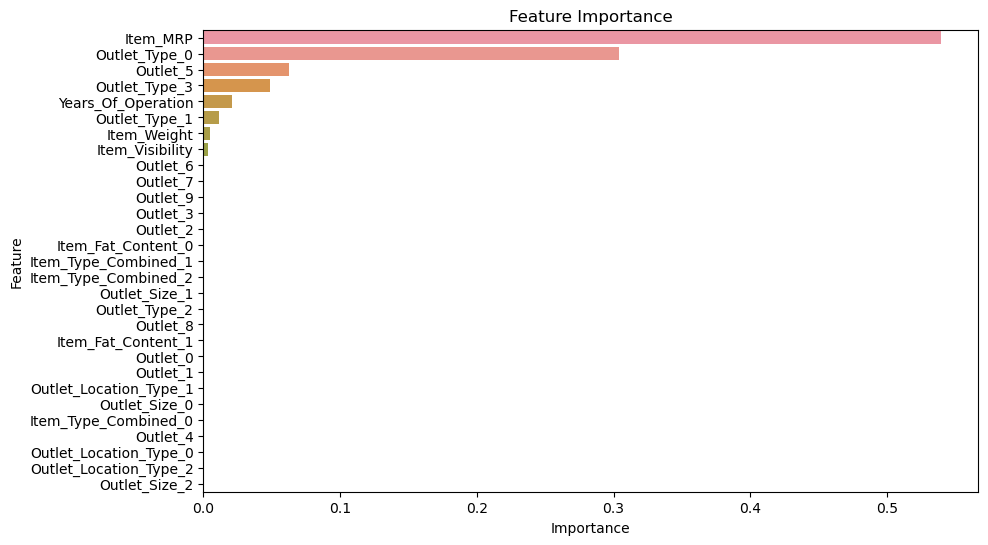

In [645]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": best_model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("Feature Importance")
plt.show()

In [806]:
models_results = {
    "Linear_Regression": metrics_lr,
    "Ridge_Regression": metrics_ridge,
    "Decision_Tree": metrics_dt,
    "Random_Forest": metrics_rf,
    "Gradient_Boosting": metrics_gb,
    "XGBoost": metrics_xgb,
    "LightGBM": metrics_lgbm,
    "SVR": metrics_svr,
    "Tuned_Gradient_Boosting": metrics_gb_tuned,
    "Tuned_LightGBM": metrics_lgbm_tuned
}
df_models_score =pd.DataFrame.from_dict(models_results, orient='index').reset_index()
df_models_score.rename(columns={'index': 'Model'}, inplace=True)

df_models_score

,Model,RMSE,R2,MAE,CV Mean RMSE,CV Mean R2,CV Mean MAE
0,Linear_Regression,1067.020899,0.581109,790.427896,1145.374650,0.555265,850.762543
1,Ridge_Regression,1067.026580,0.581104,790.425156,1145.372018,0.555268,850.735560
2,Decision_Tree,1501.048004,0.171019,1061.089951,1556.940859,0.175862,1078.915635
3,Random_Forest,1075.123835,0.574723,750.984451,1155.464130,0.546703,806.178692
4,Gradient_Boosting,1035.787446,0.605273,721.479187,1097.697501,0.591201,769.466821
5,XGBoost,1135.020034,0.526017,790.874726,1212.444344,0.501781,848.279135
6,LightGBM,1033.139477,0.607289,723.740328,1140.440830,0.558586,792.498495
7,SVR,1474.809156,0.199748,1093.144041,1582.438052,0.151955,1160.890150
8,Tuned_Gradient_Boosting,1023.857728,0.614313,719.490855,1093.312989,0.594500,768.963037
9,Tuned_LightGBM,1019.505233,0.617586,714.431160,1094.822153,0.593396,768.186015
